# data prep

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("data/diabetes.csv")

# delete broken data
df = df.dropna(how='any',axis=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
OUTPUT_KEY = "Outcome"

X = df.drop(OUTPUT_KEY, axis=1).values
y = df[OUTPUT_KEY].values

[ 6.  1.  8.  1.  0.  5.  3. 10.  2.  8.  4. 10. 10.  1.  5.  7.  0.  7.
  1.  1.  3.  8.  7.  9. 11. 10.  7.  1. 13.  5.  5.  3.  3.  6. 10.  4.
 11.  9.  2.  4.  3.  7.  7.  9.  7.  0.  1.  2.  7.  7.  1.  1.  5.  8.
  7.  1.  7.  0.  0.  0.  2.  8.  5.  2.  7.  5.  0.  2.  1.  4.  2.  5.
 13.  4.  1.  1.  7.  5.  0.  2.  3.  2.  7.  0.  5.  2. 13.  2. 15.  1.
  1.  4.  7.  4.  2.  6.  2.  1.  6.  1.  1.  1.  0.  1.  2.  1.  1.  4.
  3.  0.  3.  8.  1.  4.  7.  4.  5.  5.  4.  4.  0.  6.  2.  5.  0.  1.
  3.  1.  1.  0.  4.  9.  3.  8.  2.  2.  0.  0.  0.  5.  3.  5.  2. 10.
  4.  0.  9.  2.  5.  2.  1.  4.  9.  1.  8.  7.  2.  1.  2. 17.  4.  7.
  0.  2.  0.  6.  3.  4.  4.  3.  6.  6.  2.  1.  2.  8.  6.  0.  5.  5.
  6.  0.  1.  5.  4.  7.  8.  1.  8.  5.  3.  9.  7. 11.  8.  5.  1.  3.
  4.  4.  0.  1.  0.  2.  6.  5.  8.  5.  1.  7.  2.  0.  7.  0.  9. 12.
  5.  6.  5.  5.  0.  2.  7.  7.  1.  1.  0.  3.  4.  0.  4.  6.  1.  4.
  3.  4.  7.  0.  9.  0.  1.  4.  3.  6.  2.  9. 10

[Text(0.5, 0, 'x_1 - Glucose'), Text(0, 0.5, 'x_5 - BMI')]

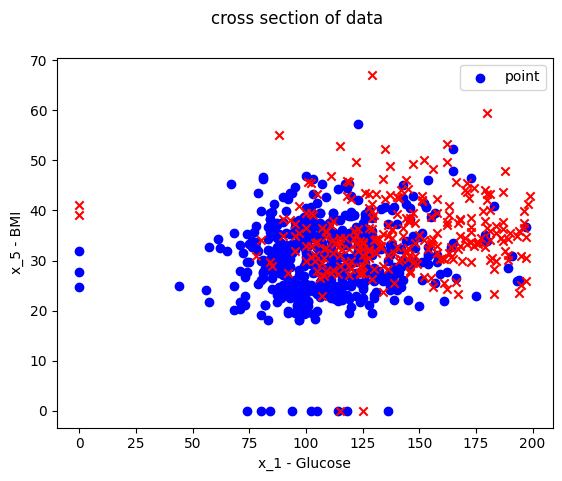

In [41]:
import matplotlib.pyplot as plt

i1 = 1
i2 = 5
print(X[:, 0], np.where(y==0, "o", "x").shape)

X1 = X[:, i1]
X2 = X[:, i2]

# visualization
fig, axs = plt.subplots(1, 1)
fig.suptitle(f'cross section of data')
# customize this line!
points1 = axs.scatter(X1[y==0], X2[y==0], c="b", marker="o")
points2 = axs.scatter(X1[y==1], X2[y==1], c="r", marker="x")
points1.set_label('point')
axs.legend()
axs.set(xlabel=f'x_{i1} - {df.columns.values[i1]}', ylabel=f'x_{i2} - {df.columns.values[i2]}')

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

array([[  9.   , 145.   ,  80.   , ...,  37.9  ,   0.637,  40.   ],
       [ 10.   , 129.   ,  62.   , ...,  41.2  ,   0.441,  38.   ],
       [  7.   , 102.   ,  74.   , ...,  37.2  ,   0.204,  45.   ],
       ...,
       [ 13.   , 126.   ,  90.   , ...,  43.4  ,   0.583,  42.   ],
       [  4.   , 171.   ,  72.   , ...,  43.6  ,   0.479,  26.   ],
       [  9.   , 102.   ,  76.   , ...,  32.9  ,   0.665,  46.   ]])

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [44]:
scaled_X_test

,x0,x1,x2,x3,x4,x5,x6,x7
0,0.983349,0.499364,0.221374,0.163148,0.475490,-0.754147,0.414461,1.556484
1,-0.837522,0.951906,-0.568830,-1.461839,-0.755266,-0.742774,-0.942882,-0.952995
2,0.679871,-0.315212,-0.568830,0.225648,-0.755266,-0.867875,-0.864574,-0.520327
3,-0.230565,-1.763347,0.672920,0.288147,-0.755266,0.201165,-0.757262,1.123815
4,-0.837522,-0.104026,0.447147,0.350647,0.885742,0.394502,-0.023485,-0.693394
...,...,...,...,...,...,...,...,...
149,0.679871,-0.616907,-0.568830,-0.274348,-0.262964,-0.651792,-0.020585,-0.087658
150,-0.230565,-0.134195,-0.230171,0.975642,0.521073,0.621957,-1.026991,-0.433793
151,1.286828,2.068176,0.447147,-1.461839,-0.755266,1.736488,-1.064695,0.864214
152,0.376392,0.499364,0.672920,-1.461839,-0.755266,-3.711065,0.394159,3.114093


# model

In [45]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(X_test, y_test, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - binary_accuracy: 0.4839 - loss: 6.1449
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6010 - loss: 3.3080
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5772 - loss: 1.2312
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5737 - loss: 1.2414
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.6132 - loss: 1.0358
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.6006 - loss: 0.8773
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.6448 - loss: 0.8390
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.6488 - loss: 0.6959
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.6830 - loss: 0.6320
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.7255 - loss: 0.6074
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.7116 - loss: 0.64

In [46]:
model.metrics_names

['loss', 'compile_metrics']

In [48]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8040 - loss: 0.3640 


[0.3516584038734436, 0.8376623392105103]

In [49]:
X_test.shape

(154, 8)

In [50]:
X_test[0]

array([  7.   , 136.   ,  74.   ,  26.   , 135.   ,  26.   ,   0.647,
        51.   ])

In [51]:
scaled_X_train.shape

(614, 8)

In [52]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [53]:
y_pred

array([[3.38228405e-01],
       [5.89607477e-01],
       [5.33825219e-01],
       [1.44031765e-02],
       [3.70723829e-02],
       [7.11878061e-01],
       [4.77787048e-01],
       [2.99266949e-02],
       [1.97927684e-01],
       [1.65121164e-02],
       [3.34503174e-01],
       [1.06523812e-01],
       [9.32480574e-01],
       [8.42294276e-01],
       [2.08084323e-02],
       [7.89929330e-01],
       [5.09794593e-01],
       [1.91271275e-01],
       [2.50475377e-01],
       [4.31884736e-01],
       [4.34373856e-01],
       [3.66785437e-01],
       [9.90235567e-01],
       [4.69588578e-01],
       [2.35428348e-01],
       [5.64913392e-01],
       [2.54465211e-02],
       [7.93703616e-01],
       [8.38292413e-04],
       [5.09661019e-01],
       [2.62263089e-01],
       [2.23062485e-02],
       [2.21017804e-02],
       [4.91203904e-01],
       [5.39893270e-01],
       [6.35313272e-01],
       [1.86670467e-01],
       [1.28377229e-01],
       [1.15782730e-01],
       [2.79003173e-01],


# choosing threshold

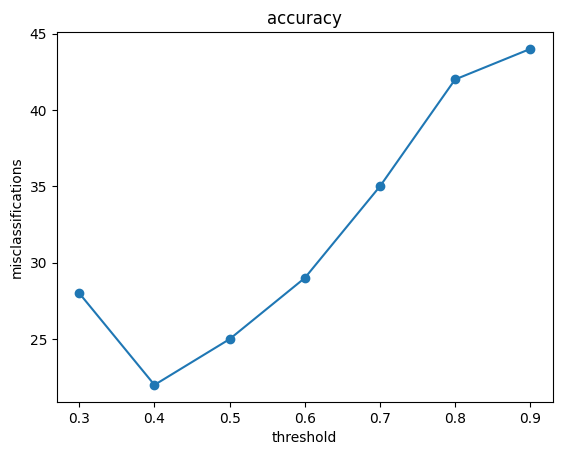

In [54]:
THRESHOLD_RANGE = np.arange(0.3, 0.9, 0.1)
misclassifications = []

for THRESHOLD in THRESHOLD_RANGE:
    misclassifications.append(y_test[(y_pred.T[0] > THRESHOLD) != y_test].shape[0])

plt.plot(THRESHOLD_RANGE, misclassifications, marker='o')
plt.title('accuracy')
plt.xlabel('threshold')
plt.ylabel('misclassifications')
plt.show() 

so 0.5 threshold is optimal

# training approach 2: logistic regression
- for linear proportionalities between feature and output
- easier to understand 

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

c:\Users\slotl\Documents\GitHub\ml-with-numbers\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [60]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [61]:
print("accuracy:", len(y_pred[y_pred == y_test])/len(y_pred))

accuracy: 0.7792207792207793


unfortunately not better - probably due to the fact that non-linearity is present in the correlation in diabetes detection